In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

## import the library below:

In [2]:
from PyEyeSim import EyeData


In [3]:
%load_ext autoreload
%autoreload 2

## Step 1. 

#### read .csv file containing fixations for all stimuli and participants in a single file with pandas

In [4]:
Path='../'
FilePath=Path+'FixDatUrban.csv'
FixData=pd.read_csv(FilePath)
print(np.shape(FixData))


(29324, 17)


In [5]:
FixData=FixData[FixData.age>0]

## Step 2

#### pass pandas dataframe, to pyeyesim, providing information on screen size in pixels

(we run the pipeline here because this nb is to demonstrate the inference pipeline not the descriptives)


dataset size:  (21165, 17)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
column found:  mean_x  default:  mean_x
column found:  mean_y  default:  mean_y
info found for 40 subjects, and 64 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
1.0
stimulus size in y is full screen
stimulus size in x full screen
 
2.0
stimulus size in y is full screen
stimulus size in x full screen
 
3.0
stimulus size in y is full screen
stimulus size in x full screen
 
4.0
stimulus size in y is full screen
stimulus size in x full screen
 
5.0
stimulus size in y is full screen
stimulus size in x full screen
 
6.0
stimulus size in y is full screen
stimulus size in x full screen
 
7.0
stimulus size in y is full screen
stimulus size in x f

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
        53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 36., 37., 38., 39., 40., 41., 42., 43., 44.,
        45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56., 57.,
        58.]))

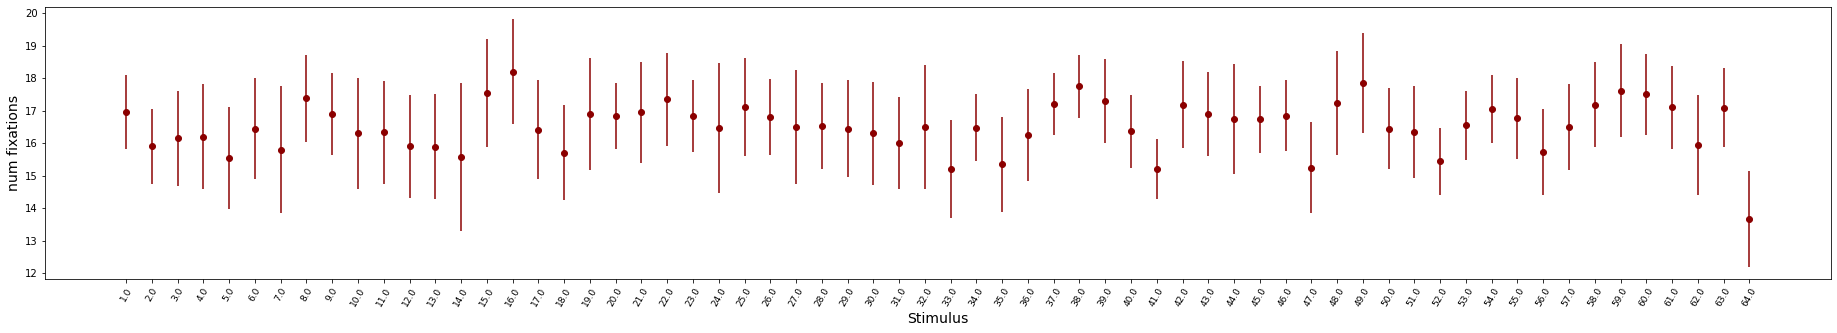

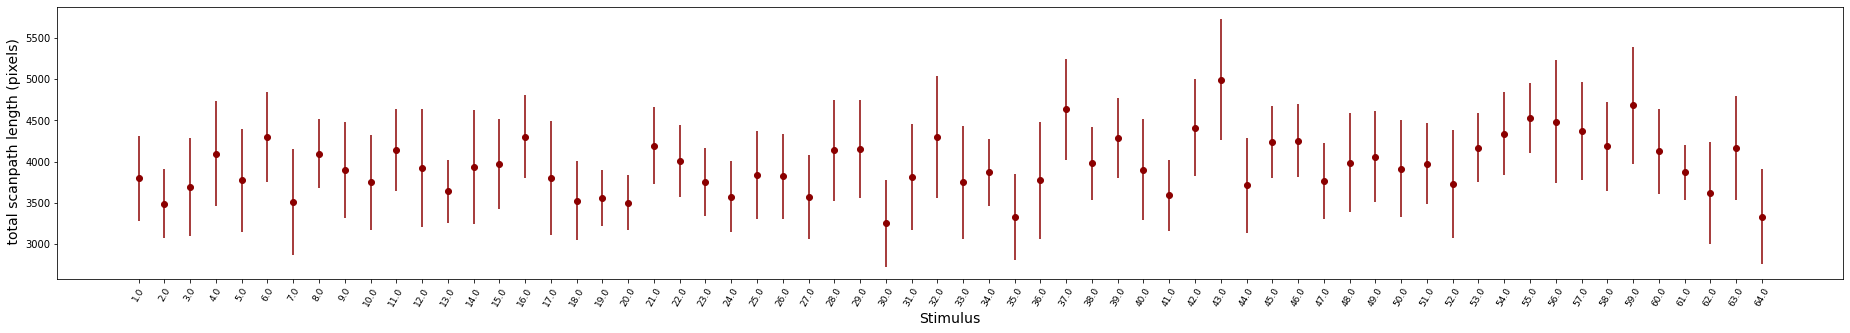

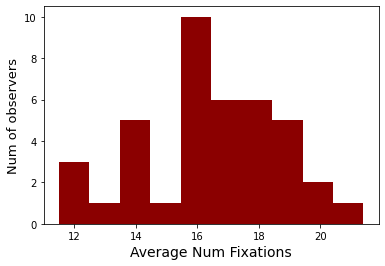

In [6]:

sizeX,sizeY=1280,960


UrbanDat=EyeData(FixData,sizeX,sizeY)
UrbanDat.DataInfo(FixDuration='length',Stimulus='filenumber',subjectID='SUBJECTINDEX',StimPath='../8/',StimExt='.png')
UrbanDat.RunDescriptiveFix(Visual=1)


## Step 3
fitting and visualizting HMM for a singe stimulus

the hidden markov model is fitted to a all stimuli , read more here: https://datascience.oneoffcoder.com/gaussian-hmm.html#

(2, 2)
(2, 2)
(2, 2)
(2, 2)


(GaussianHMM(covariance_type='full', n_components=4),
 -13.130139028668717,
 -13.623211163991524)

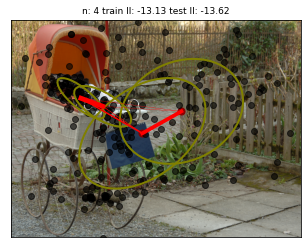

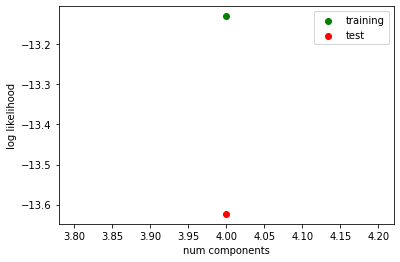

In [7]:
# choose stimulus, choose ncomp (number of hidden states)
UrbanDat.FitVisHMM(UrbanDat.stimuli[0],incol=False,ncomp=4)

### saccade similarity - angle method pipeline

divs=[6,7]: 6 * 6 and 7 * 7  grids are used for saccade similarity 


In [8]:
StimSims,StimSimsInd,SimsAll=UrbanDat.SacSimPipeline(divs=[6,7],normalize='add');


0 6


/Users/juliusduin/Desktop/uni_work/PyEyeSim/PyEyeSim/scanpathshelpdebug.py:107: RuntimeWarning: invalid value encountered in arccos
  Ang=np.degrees(np.arccos((self.x2-self.x1)/self.length()))  #calculate angel of saccades
/Users/juliusduin/Desktop/uni_work/PyEyeSim/PyEyeSim/_scanpathsim.py:154: RuntimeWarning: Mean of empty slice
  StimSimsInd[cd,:,:]=np.nanmean(np.nanmean(np.nanmean(SimSacP,4),3),0)
/Users/juliusduin/Desktop/uni_work/PyEyeSim/PyEyeSim/_scanpathsim.py:155: RuntimeWarning: Mean of empty slice
  StimSims[cd,:]=np.nanmean(np.nanmean(np.nanmean(np.nanmean(SimSacP,4),3),0),0)


1 7


/Users/juliusduin/Desktop/uni_work/PyEyeSim/PyEyeSim/_scanpathsim.py:157: RuntimeWarning: Mean of empty slice
  return StimSims,np.nanmean(StimSimsInd,0),SimsAll


### demonstrate the RSA pipeline

first, use pipeline to extract heatmaps and calculate RDMs.  on every stimulus, every subjects heatmap is extracted and correlated with every other heatmap

In [9]:
rdms = UrbanDat.RSA_heatmap_pipeline([sizeX, sizeY], resize_to=(10, 10))

Processing 64 stimuli with 4 threads


In [28]:
list(rdms.keys())

[2.0,
 4.0,
 3.0,
 1.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 20.0,
 19.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 27.0,
 26.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 40.0,
 39.0,
 41.0,
 43.0,
 42.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 56.0,
 55.0,
 57.0,
 58.0,
 60.0,
 59.0,
 61.0,
 62.0,
 64.0,
 63.0]

show example rdm, its a trimmed matrix of shape (n,n) where n is the number of participants that have seen the stimulus. 

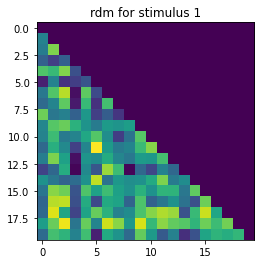

In [10]:
example_rdm = rdms[list(rdms.keys())[0]] #use first stimulus as an example
plt.imshow(example_rdm)
plt.title("rdm for stimulus 1");

In [32]:
example_rdm[5]

array([0.07158519, 0.35344984, 0.11800616, 0.14859871, 0.20692366,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [11]:
memrdm = np.ones(example_rdm.shape)
memrdm = np.tril(memrdm, -1)
ones_indices = np.argwhere(memrdm == 1)

# Randomly select half of these indices
num_to_change = len(ones_indices) // 2
indices_to_change = np.random.choice(len(ones_indices), num_to_change, replace=False)

# Change the selected indices to 2
for idx in indices_to_change:
    memrdm[tuple(ones_indices[idx])] = 2

to demonstrate how to use that data, we create a random memory matrix with the same format (nXn, trimmed) and fill it with 1s and 2s (memory indicators)

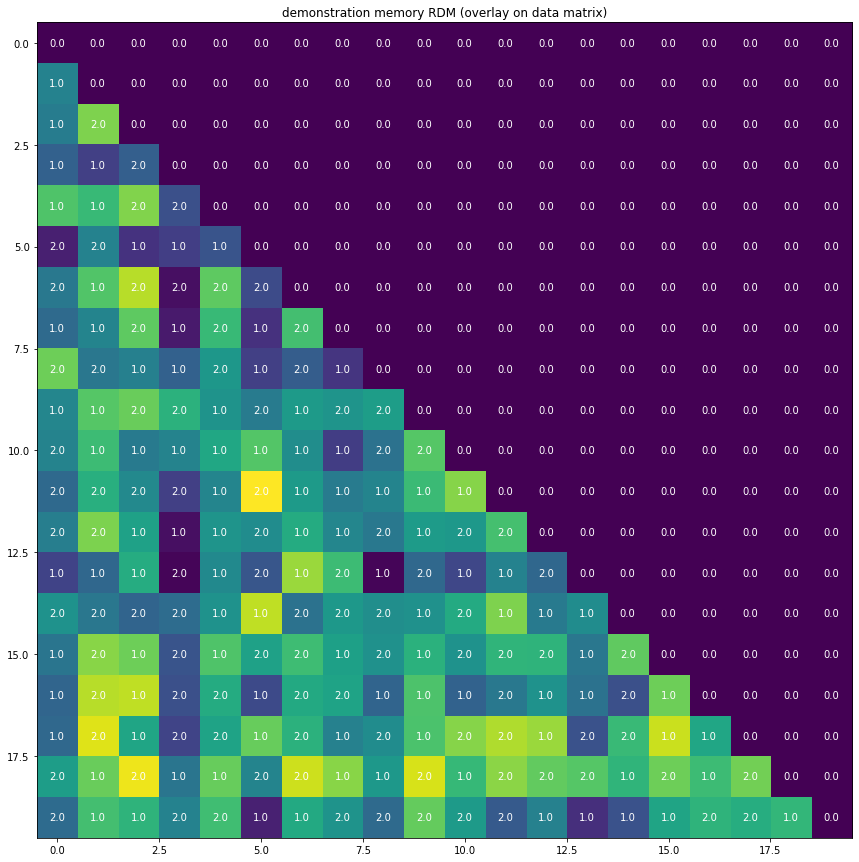

In [12]:
plt.figure(figsize=(15,15))
plt.imshow(example_rdm)
for i in range(memrdm.shape[0]):
    for j in range(memrdm.shape[1]):
        annotation = memrdm[i, j]
        plt.text(j, i, str(annotation), ha='center', va='center', color='white')
plt.title("demonstration memory RDM (overlay on data matrix)");

this data can then be used to index into the example_rdm - it calculated the mean similarity for both memory groups


In [13]:
mem1 = example_rdm[memrdm == 1]
mem2 = example_rdm[memrdm == 2]

print(f"means: mem 1: {np.mean(mem1):.2f} mem 2: {np.mean(mem2):.2f}")

means: mem 1: 0.40 mem 2: 0.44


### below dimensions StimSims:

StimSims:  num division  * np (num stimuli)

StimSimsInd: ns(num subjects) * np 

SimsAll: list of divisions, each containing ns*ns*np*ndiv*ndiv

In [14]:
np.shape(StimSims),np.shape(StimSimsInd)
print(len(SimsAll),np.shape(SimsAll[0]))

2 (40, 40, 64, 6, 6)


### visualize calculated similarity for a stimulus for a given division (averaged across observers)

/var/folders/8m/q_qpbv793lsgvltlh5w0fp6m0000gn/T/ipykernel_46656/3707526228.py:3: RuntimeWarning: Mean of empty slice
  Means=np.nanmean(np.nanmean(SimsAll[divn][:,:,stimn,:,:],0),0)


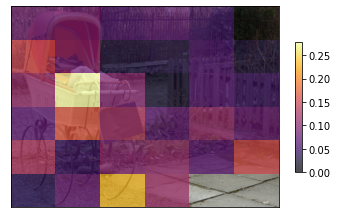

In [15]:
divn=0
stimn=0
Means=np.nanmean(np.nanmean(SimsAll[divn][:,:,stimn,:,:],0),0)
UrbanDat.VisGrid(Means,UrbanDat.stimuli[stimn],cbar=True,alpha=.7)

### visualizing calculated similarity for a different division

/var/folders/8m/q_qpbv793lsgvltlh5w0fp6m0000gn/T/ipykernel_46656/865399841.py:3: RuntimeWarning: Mean of empty slice
  Means=np.nanmean(np.nanmean(SimsAll[divn][:,:,stimn,:,:],0),0)


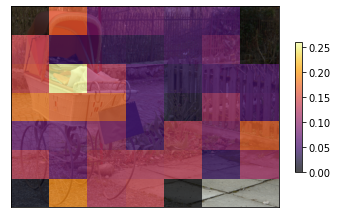

In [16]:
divn=1
stimn=0
Means=np.nanmean(np.nanmean(SimsAll[divn][:,:,stimn,:,:],0),0)
UrbanDat.VisGrid(Means,UrbanDat.stimuli[stimn],cbar=True,alpha=.7)

### changing normalization to "mult"
multiplicative normalization tends to result in lower similarity in areas with a lot of fixations

In [17]:
StimSims,StimSimsInd,SimsAll=UrbanDat.SacSimPipeline(divs=[6,7],normalize='mult')


0 6
1 7


/var/folders/8m/q_qpbv793lsgvltlh5w0fp6m0000gn/T/ipykernel_46656/865399841.py:3: RuntimeWarning: Mean of empty slice
  Means=np.nanmean(np.nanmean(SimsAll[divn][:,:,stimn,:,:],0),0)


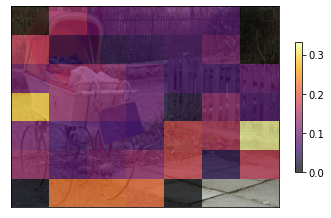

In [18]:
divn=1
stimn=0
Means=np.nanmean(np.nanmean(SimsAll[divn][:,:,stimn,:,:],0),0)
UrbanDat.VisGrid(Means,UrbanDat.stimuli[stimn],cbar=True,alpha=.7)

### hidden markov model pipeline
fitting for each stimulus and testing on each participant

potentially long run time, depending on number of participants and stimuli
as leave-one-out cross-validation is used.

in the example below, HMM with 4 and 5 hiddens states is fitted to all stimuli, as many times as participants (leaving out one participant each time)

num obsvers changes, because they are not used if they dont have at least 3 fixations



In [19]:
StimSimsHMM,StimSimsIndHMM=UrbanDat.HMMSimPipeline(ncomps=[4,5])

(2, 64)
fitting HMM with 4 components
for stimulus 1.0
num valid observers 21
for stimulus 2.0
num valid observers 20
for stimulus 3.0
num valid observers 20
for stimulus 4.0
num valid observers 20
for stimulus 5.0
num valid observers 20
for stimulus 6.0
num valid observers 20
for stimulus 7.0
num valid observers 20
for stimulus 8.0
num valid observers 21
for stimulus 9.0
num valid observers 20
for stimulus 10.0
num valid observers 20
for stimulus 11.0
num valid observers 21
for stimulus 12.0
num valid observers 20
for stimulus 13.0
num valid observers 19
for stimulus 14.0
num valid observers 18
for stimulus 15.0
num valid observers 20
for stimulus 16.0
num valid observers 20
for stimulus 17.0
num valid observers 19
for stimulus 18.0
num valid observers 21
for stimulus 19.0
num valid observers 20
for stimulus 20.0
num valid observers 19
for stimulus 21.0
num valid observers 20
for stimulus 22.0
num valid observers 20
for stimulus 23.0
num valid observers 20
for stimulus 24.0
num valid 

KeyboardInterrupt: 

### joint visualization of the above calculate HMM typicality and angle similarity

in the title of the first columns
the hmm likelihood is shown along the angle similarity measure

visualizing most and least typical participants for HMM and angle similarity methods



In [ ]:
for cp,p in enumerate(UrbanDat.stimuli):
    fig,ax=plt.subplots(ncols=5,figsize=(12,3)) #,figsize=(12,12))

    UrbanDat.VisScanPath(cp,ax=ax[0],col='orange',alpha=.2)
    UrbanDat.VisScanPath(cp,ax=ax[1],allS=np.nanargmax(StimSimsInd[:,cp]),alpha=1,col='orange',visFix=True)
    UrbanDat.VisScanPath(cp,ax=ax[2],allS=np.nanargmin(StimSimsInd[:,cp]),alpha=1,col='orange',visFix=True)
    UrbanDat.VisScanPath(cp,ax=ax[3],allS=np.nanargmax(StimSimsIndHMM[:,cp]),alpha=1,col='orange',visFix=True)
    UrbanDat.VisScanPath(cp,ax=ax[4],allS=np.nanargmin(StimSimsIndHMM[:,cp]),alpha=1,col='orange',visFix=True)
     
    
    
    
    for sf in range(5):
        ax[sf].set_xlim(UrbanDat.boundsX[cp,:])
        ax[sf].set_ylim([UrbanDat.boundsY[cp,1],UrbanDat.boundsY[cp,0]])

        ax[sf].set_xticks([])
        ax[sf].set_yticks([])
        
    ax[0].set_title(f'hmm={np.nanmean(StimSimsIndHMM[:,cp]):.2f} angle={np.nanmean(StimSimsInd[:,cp]):.2f}',fontsize=9)

    ax[1].set_title('most typical HMM',fontsize=11,weight='bold')
    ax[2].set_title('least typical HMM',fontsize=11,weight='bold')
    ax[3].set_title('most typical angle',fontsize=11,weight='bold')
    ax[4].set_title('least typical angle',fontsize=11,weight='bold')

In [ ]:
fig,ax=plt.subplots()
ax.scatter(np.nanmean(StimSimsHMM,0),np.nanmean(StimSims,0))
ax.set_xlabel('hmm likelihood')
ax.set_ylabel('angle similarity')


## the two methods correlate across stimuli (averged across observers)

the below uses the average of both 4 and 5 components.
it could be suggested to use the better model only 

In [ ]:
stats.pearsonr(np.nanmean(StimSimsHMM,0),np.nanmean(StimSims,0))

## but also show a weaker correlatation across observers (averged across stimuli)

In [ ]:
stats.pearsonr(np.nanmean(StimSimsIndHMM,1),np.nanmean(StimSimsInd,1))

In [ ]:
Indmean=UrbanDat.GetInddiff_v2(300,Vis=True)

In [ ]:
UrbanDat.GetInddiff(3,3,Vis=True,zscore=0,InferS=1)

### group comparison - descriptives
two groups, between subject comparison

!runnning between group comparison
Conditions [1. 2.]
0 1.0 num participants:  23
0 1.0 Num fix=  16.34 +/- 1.97
0 1.0 Entropy=  2.62 +/- 0.12
0 1.0 tot scanpath len =  4188.62 +/- 673.75 pix
0 1.0 saccade amplitude =  274.35 +/- 34.9 pix

1 2.0 num participants:  17
1 2.0 Num fix=  16.8 +/- 2.41
1 2.0 Entropy=  2.61 +/- 0.19
1 2.0 tot scanpath len =  3642.02 +/- 1048.22 pix
1 2.0 saccade amplitude =  229.82 +/- 51.86 pix


 
Overall group differences:  1.0 vs 2.0
Entropy t= 0.228 , p= 0.8209
Num Fix t= -0.6371 , p=  0.5279
Scanpath lengths t= 1.9522 , p= 0.0583
Saccade amplitudes t= 3.1602 , p= 0.0031
 


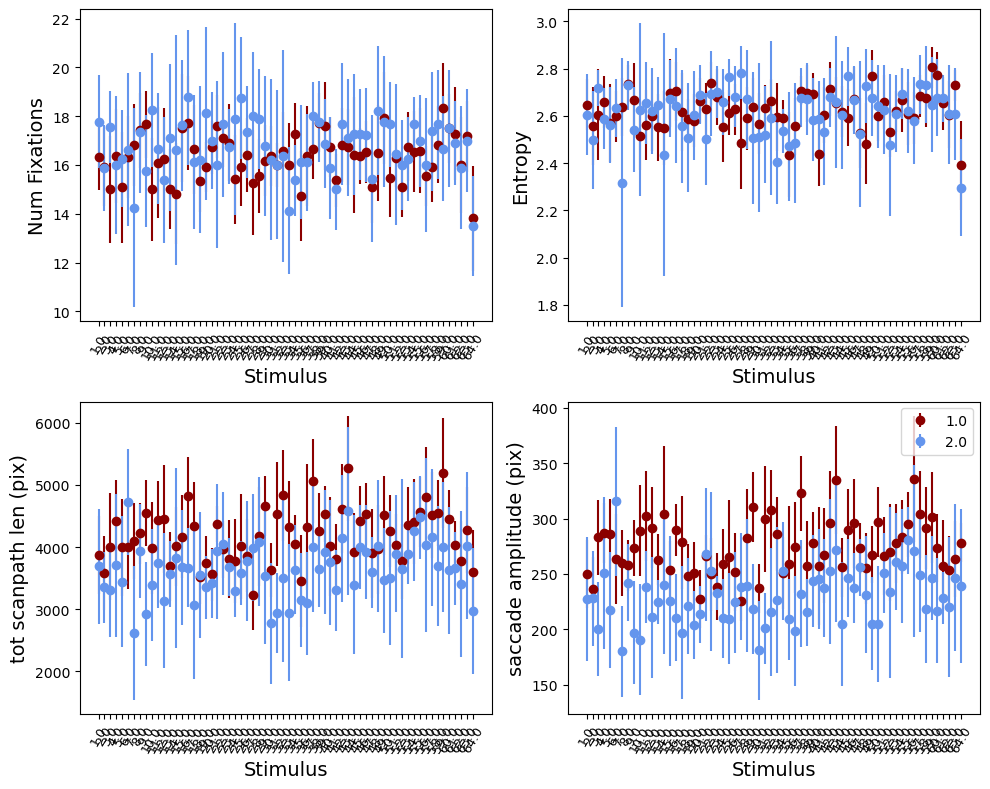

In [79]:
UrbanDat.CompareGroupsFix('age')

### group comparison - heatmap

resolution x = 1280  y = 960
dimensions= (40, 960, 1280)
reduced dims (40, 120, 160)
Conditions [1. 2.]
num observers in group 1: 12
num observers in group 2: 9
100 permutations starting


8.548369568015033

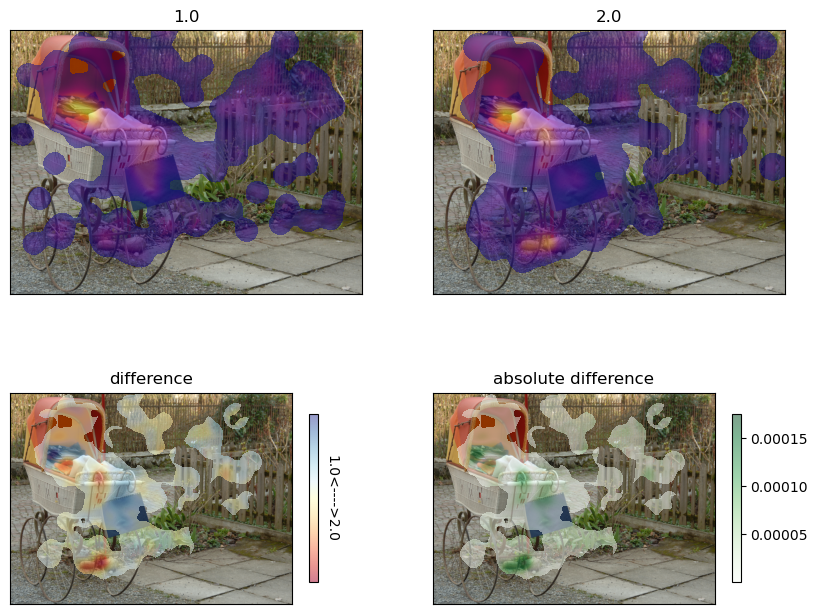

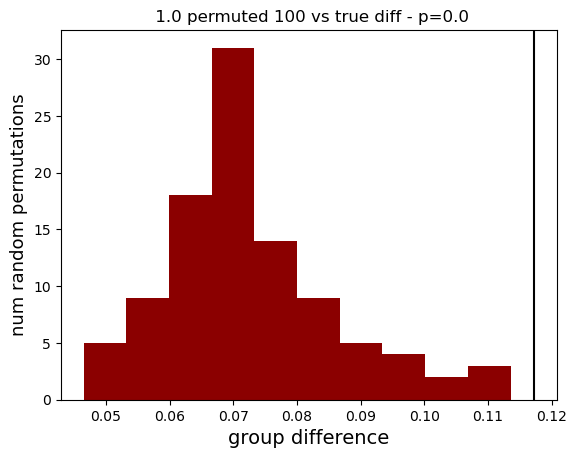

In [81]:
UrbanDat.CompareGroupsHeatmap(UrbanDat.stimuli[0],'age')

### group comparison - grid fixations

Conditions [1. 2.]


/Users/aratoj87/Documents/GitHub/PyEyeSim/PyEyeSim/statshelper.py:55: RuntimeWarning: divide by zero encountered in log2
  LogP=np.log2(StatP)


(5, 5)
(5, 5)
num significant uncorrected:  1
num significant Bonferroni - Holm corrected:  0.0


(array([[ 0.29125216,  1.14948868, -1.98050208,  2.51753617, -0.41689599],
        [ 0.88068953,  0.14578194, -1.0388062 ,  1.10414506,  1.99834142],
        [ 0.47171056, -0.60322153,  0.80165478, -1.98004287, -1.44820274],
        [-0.10363897, -0.99320732, -0.44588625,  1.23032122,  1.63641448],
        [-0.1198894 , -1.05565903,  0.86038348,         nan,         nan]]),
 array([[0.77401423, 0.26461898, 0.06231326, 0.02095054, 0.68142685],
        [0.3894904 , 0.88562906, 0.31193487, 0.28331795, 0.06019561],
        [0.64250521, 0.55349478, 0.43266491, 0.06236864, 0.16386223],
        [0.918542  , 0.3330903 , 0.66071889, 0.23359256, 0.11821013],
        [0.90582941, 0.3043632 , 0.40030462,        nan,        nan]]))

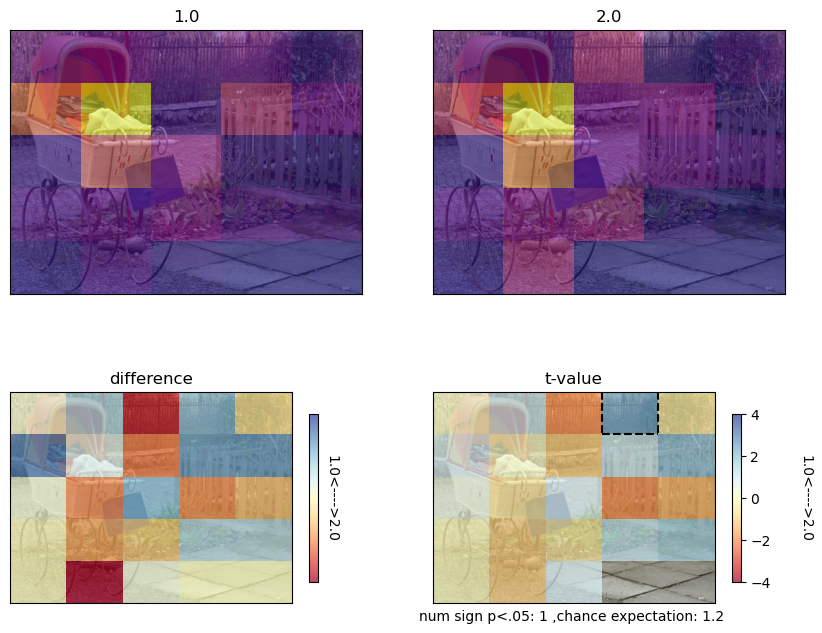

In [82]:
UrbanDat.CompareGroupsGridFix(UrbanDat.stimuli[0],'age')

### scanpath group similarity

since the measure is not symmetric, we calculate the similarity of pairs of participants within group 1, between group 1 and 2, between group 2 and 1, and finally between pairs of participants in group 2.

Conditions [1. 2.]


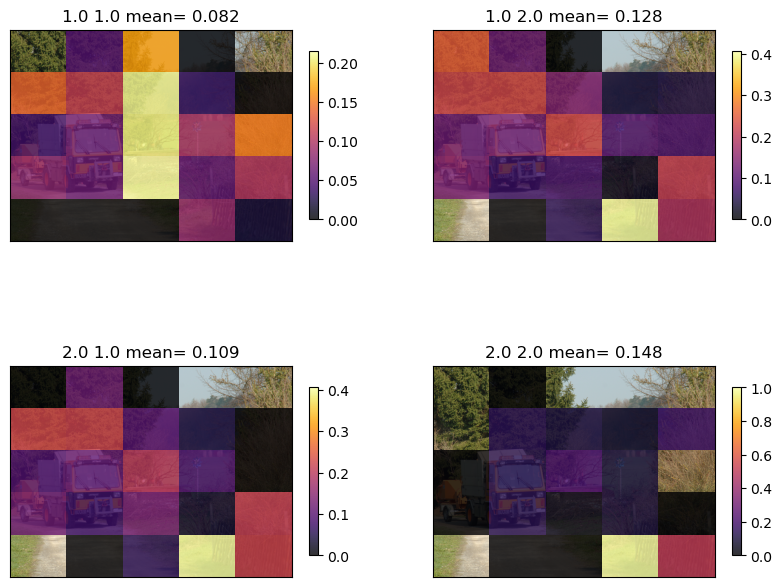

In [87]:
stimn=1
SimVals,SimValsSD=UrbanDat.ScanpathSim2Groups(UrbanDat.stimuli[stimn],'age',normalize='mult')